In [108]:
#Importar las librerías necesarias :) 
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [66]:
#Cargar los conjuntos de datos
data = pd.read_csv('C:/Users/Camila/Documents/Jupyter/data.csv')
features = pd.read_csv('C:/Users/Camila/Documents/Jupyter/featuresdf.csv')

In [115]:
#Identificando el dataset1
print(data.columns.values)
data.dtypes

['Position' 'Track Name' 'Artist' 'Streams' 'URL' 'Date' 'Region']


Position       int64
Track Name    object
Artist        object
Streams        int64
URL           object
Date          object
Region        object
dtype: object

In [116]:
#Identificando el dataset2 features
print(features.columns.values)
features.dtypes

['id' 'name' 'artists' 'danceability' 'energy' 'key' 'loudness' 'mode'
 'speechiness' 'acousticness' 'instrumentalness' 'liveness' 'valence'
 'tempo' 'duration_ms' 'time_signature']


id                   object
name                 object
artists              object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [69]:
print("El dataset 1 tiene " + str(len(data)) + " registros")
print("El dataset 2 de features tiene " + str(len(features)) + " registros")

El dataset 1 tiene 3441197 registros
El dataset 2 de features tiene 100 registros


In [70]:
#Preprocesamiento

In [71]:
data = data.dropna(axis=0, how="any")

In [72]:
features = features.dropna(axis=0, how="any")

In [73]:
print("Removiendo valores en blanco el dataset 1 tiene ahora" + str(len(data)) + " registros")

Removiendo valores en blanco el dataset 1 tiene ahora3440540 registros


In [74]:
print("Removiendo valores en blanco el dataset 2 tiene ahora" + str(len(features)) + " registros")

Removiendo valores en blanco el dataset 2 tiene ahora100 registros


In [75]:
#Crear un subconjunto del dataframe seleccionando una columna para el dataset1
posicion = data['Position']
nombre = data['Track Name']
artista = data['Artist']
stream = data['Streams']
url = data['URL']
fecha = data['Date']
region = data['Region']

In [76]:
#Crear un subconjunto del dataframe seleccionando una columna para el dataset2
nombreF = features['name']
artistas = features['artists']
es_bailable = features['danceability']
es_energica = features['energy']
key = features['key']
es_ruidosa = features['loudness']
modo = features['mode']
tiene_habla = features['speechiness']
es_acustica = features['acousticness']
es_vocal = features['instrumentalness']
en_vivo = features['liveness']
valencia = features['valence']
tempo = features['tempo']
duracion = features['duration_ms']
tiempoS = features['time_signature']

In [121]:
#Exploracion de datos
#Uso de la función describe
artista.describe()

count    100.00000
mean       0.69682
std        0.12508
min        0.25800
25%        0.63500
50%        0.71400
75%        0.77025
max        0.92700
Name: danceability, dtype: float64

In [122]:
# Media indica que la mayoria de las canciones son bailables
es_bailable.mean()

0.6968199999999999

In [128]:
# En promedio las canciones duran 3.6 minutos
duracion_minutos = (duracion.mean()*0.001)/60
print(duracion_minutos)

3.6397880000000002


In [129]:
# El número de decibeles es de -5dB
es_ruidosa.mean()

-5.652649999999998

In [130]:
#Descripción estadística de la característica liveness 
en_vivo.describe()

count    100.000000
mean       0.150607
std        0.079011
min        0.042400
25%        0.098275
50%        0.125000
75%        0.179250
max        0.440000
Name: liveness, dtype: float64

In [139]:
#Canciones que duran más de 5 minutos (5 min * 60 seg * 1000 ms)
features[features.duration_ms>= 300000]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
48,4Km5HrUvYTaSUfiSGPJeQ,Bad and Boujee (feat. Lil Uzi Vert),Migos,0.927,0.665,11.0,-5.313,1.0,0.2440,0.0610,0.00000,0.123,0.175,127.076,343150.0,4.0
58,3kxfsdsCpFgN412fpnW85,Redbone,Childish Gambino,0.743,0.359,1.0,-10.401,1.0,0.0794,0.1990,0.00611,0.137,0.587,160.083,326933.0,4.0
70,5Ohxk2dO5COHF1krpoPig,Sign of the Times,Harry Styles,0.516,0.595,5.0,-4.630,1.0,0.0313,0.0275,0.00000,0.109,0.222,119.972,340707.0,4.0


In [77]:
conteo_artistas = artistas.value_counts() #esto es una serie
top_artistas = conteo_artistas[(conteo_artistas > 1)]

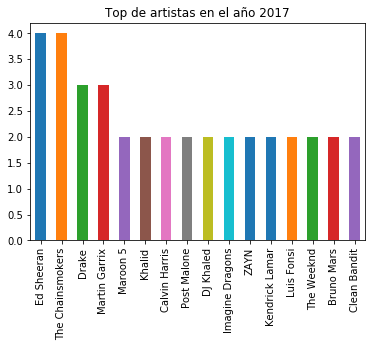

In [78]:
top_artistas.plot(kind='bar', x='Artistas' , title='Top de artistas en el año 2017' , y='Apariciones')

In [79]:
#Top 5 por cantidad de streams en Colombia
region_co = data[data['Region'] == 'co']
region_co_top5=region_co.head(5)

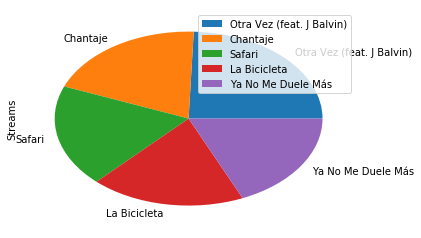

In [80]:
region_co_top5.plot.pie(y='Streams',labels=region_co_top5['Track Name'])

In [81]:
#Top 5 por cantidad de streams en USA
region_us = data[data['Region'] == 'us']
region_us_top5=region_us.head(5)

In [82]:
region_us_top5

,Position,Track Name,Artist,Streams,URL,Date,Region
771622,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2017-01-01,us
771623,2,Fake Love,Drake,1180074,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-01,us
771624,3,Starboy,The Weeknd,1064351,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,us
771625,4,Closer,The Chainsmokers,1010492,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,us
771626,5,Black Beatles,Rae Sremmurd,874289,https://open.spotify.com/track/6fujklziTHa8uoM...,2017-01-01,us


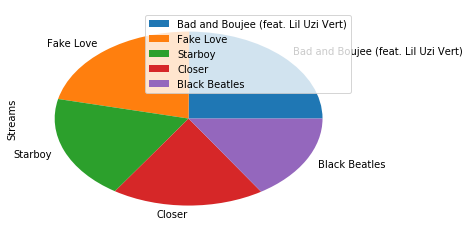

In [83]:
region_us_top5.plot.pie(y='Streams',labels=region_us_top5['Track Name'])

In [84]:
teddysBear = data[(data['Region']=='co') & (data['Artist']=='Ed Sheeran') & (data['Position']<=100)]

In [85]:
teddysBear.columns.values

array(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date',
       'Region'], dtype=object)

In [86]:
t = teddysBear.groupby('Track Name').sum()

In [87]:
t.sort_values('Streams', ascending=False)

,Position,Streams
Track Name,,
Shape of You,3773,14826643
Castle on the Hill,4788,1765054
Perfect,9988,1633534
Thinking Out Loud,12977,1130695
Galway Girl,6696,811758
Shape of You (Latin Remix) [feat. Zion & Lennox],8383,807094
Photograph,5784,519487
Perfect Duet (Ed Sheeran & Beyoncé),2512,314049
Happier,1552,156209


In [97]:
from wordcloud import WordCloud
import os

In [95]:
os.chdir("C://Users/Camila/Desktop")

In [114]:
#Wordcloud de el artista que está liderando el top
wordcloud = WordCloud(background_color='white', mode = "RGB", width = 2000, height=1000).generate(' '.join(data['Artist']))

In [102]:
print(wordcloud)

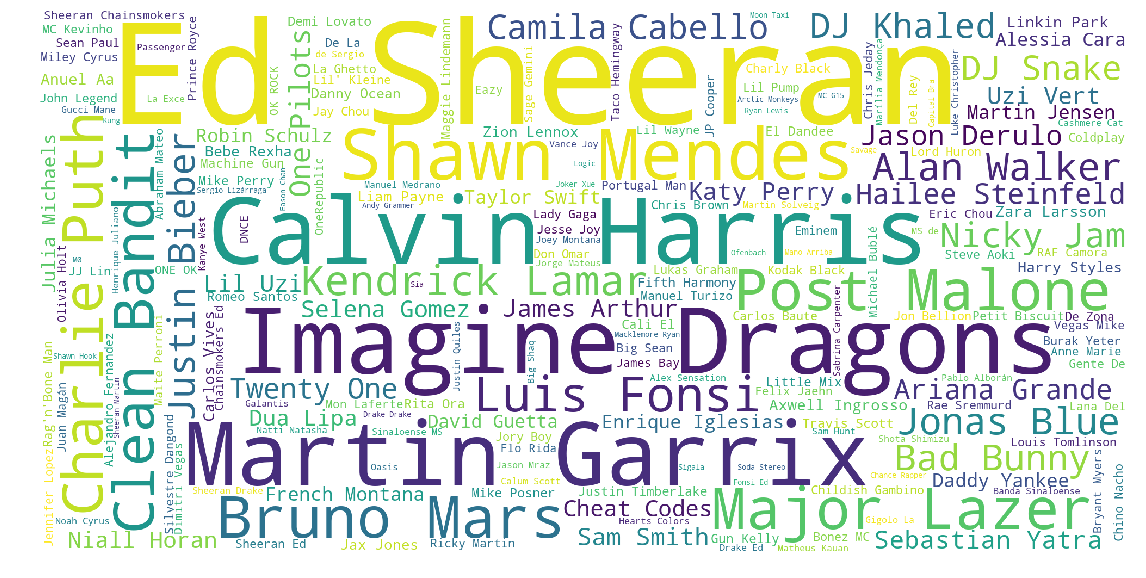

In [113]:
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [172]:
#Extraer las características del dataset
feat = features.loc[:, 'danceability':'liveness']

In [173]:
#Matriz de correlación de las características
matriz = feat.corr(method='pearson')

In [174]:
arr=matriz.columns.values
print(arr)

['danceability' 'energy' 'key' 'loudness' 'mode' 'speechiness'
 'acousticness' 'instrumentalness' 'liveness']


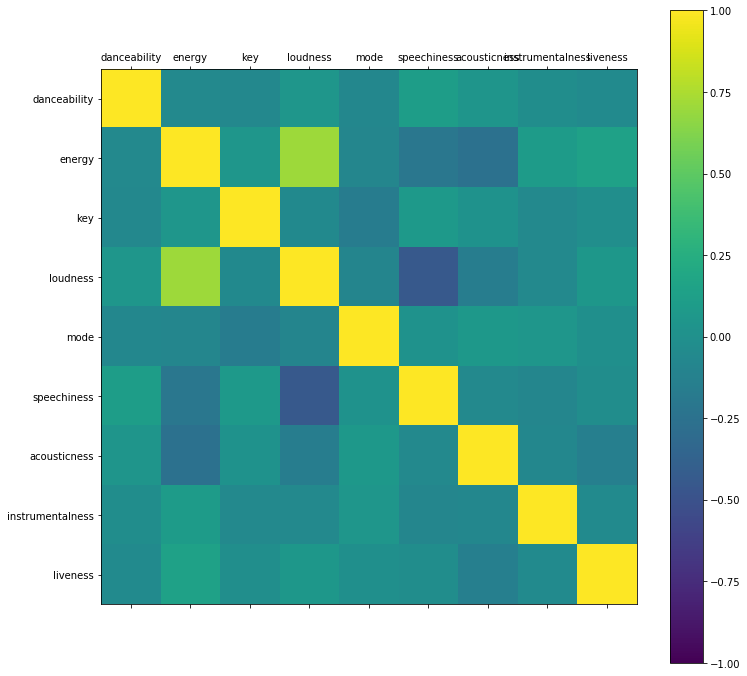

In [178]:
#Gráfico de la matriz de correlación
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(matriz, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(arr)
ax.set_yticklabels(arr)
plt.show()